In [4]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
from progress_learner import EventProgressEstimator
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
p = project.Project.load("../slidearound_hopstep_1_multiscale.proj")
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [140]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress.mod')

action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, 
                               policy_est, session = sess)

def action_policy(config):
    def boundary_constraint(action):
        for i in range(3):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    def q(state, policy_estimator, no_of_actions = 1, verbose = False, 
       session = None):
        return action_learner_search.random_action_constraint(state, policy_estimator,
                    no_of_actions, verbose, session, boundary_constraint)
    
    return q

explorations = action_ln.learn_one_setup(action_policy(c), verbose = True)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (10, 200) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod
action_level = 0
exploration_index = 0
[(0, 0.62062972784042358), (0, 0.56581997871398926), (0, 0.53294509649276733), (0, 0.52490353584289551), (0, 0.49802336096763611), (0, 0.4730965793132782), (0, 0.47224882245063782), (0, 0.45543560385704041), (0, 0.4548715353012085), (0, 0.44204229116439819), (0, 0.37633392214775085), (0, 0.35779765248298645), (0, 0.34500837326049805), (0, 0.34415116906166077), (0, 0.34013795852661133), (0, 0.33834412693977356), (

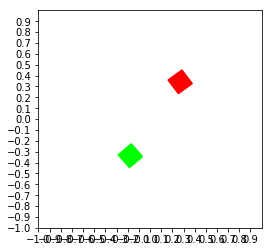

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.02334552 -0.85169628  0.46969514]
[[0.875, 1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.875, 1.0, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.8, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.8, 0.0, 0.0, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.7, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.875, 0.6, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.875, 0.5, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, 0.0, 0.0, -

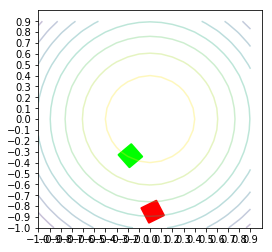

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.11892631  0.55380828  0.59958113]
[[0.875, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.875, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.75, 0.5, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.6, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, 0.0, -0.7615941559557649, -0.4621171572600

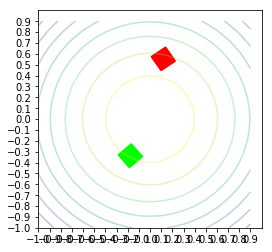

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.11892631  0.55380828  0.59958113]
[[0.875, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.875, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.75, 0.5, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.6, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, 0.0, -0.7615941559557649, -0.4621171572600

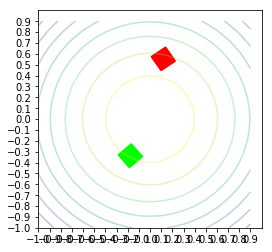

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.11892631  0.55380828  0.59958113]
[[0.875, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.875, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.75, 0.5, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.6, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.7, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, 0.0, -0.7615941559557649, -0.4621171572600

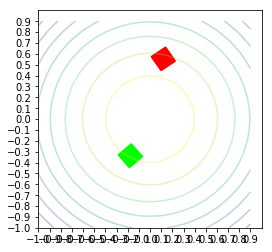

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.14834211  0.60763303  0.35983811]
[[0.875, 1.0, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.8, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.7, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.875, 0.5, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.75, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.5, 0.0, 0.0, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.625, 0.6, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.5, 0.8, -0.46211715726000974, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.5, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.625, 0.6, 0.46211715726000974, -0.7615941

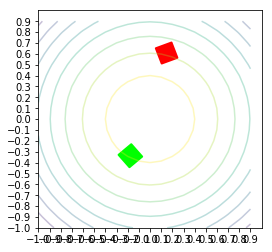

In [143]:
explorations[2].replay()

In [102]:
print (explorations[8].start_config)

for _, from_t, to_t, _, _, success, _, _ in explorations[8].action_storage:
    print (str(from_t) + " " + str(to_t) + " " + str(success) ) 

[Cube : [ 0.11508257  0.27450787  1.31764692], Cube : [ 0.17917307 -0.57467395  1.55726747]]
[ 0.11508257  0.27450787  1.31764692] [ 0.56557119 -0.90723181  0.23506949] True
[ 0.56557119 -0.90723181  0.23506949] [ 0.56557119 -0.90723181  0.23506949] True
[ 0.56557119 -0.90723181  0.23506949] [-0.46839644 -0.75595641  0.12380904] True


In [127]:
reload(block_movement_env)
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [128]:
a.default()

array([-0.71322928, -0.68750558,  0.5       , -0.71322928, -0.68750558,
        0.5       , -0.2344808 , -0.16797299,  0.6       , -0.2344808 ,
       -0.16797299,  0.6       ])

In [129]:
a.default_action()

[-0.75, 0.5, 0.5]
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
[-0.75, 0.5, 0.5]
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
[-0.3, 0.55, 0.5]
path_distance = 0.4528; frame_distance = 0.0820; left_over_distance = 0.0000 
pos = 0.0820
pos = 0.1641
pos = 0.2461
pos = 0.3282
pos = 0.4102
path_distance = 1.1881; frame_distance = 0.0820; left_over_distance = 0.0395 
pos = 0.0426
pos = 0.1246
pos = 0.2066
pos = 0.2887
pos = 0.3707
pos = 0.45

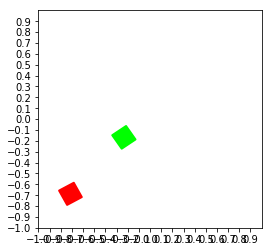

(None, None)
[-0.75  0.5   0.5 ]
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
[[0.375, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.375, 0.9, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, 0.0

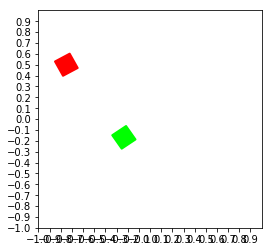

(None, None)
[-0.75  0.5   0.5 ]
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
path_distance = 1.1881; frame_distance = 0.0594; left_over_distance = 0.0000 
pos = 0.0594
pos = 0.1188
pos = 0.1782
pos = 0.2376
pos = 0.2970
pos = 0.3564
pos = 0.4158
pos = 0.4752
pos = 0.5346
pos = 0.5940
pos = 0.6534
pos = 0.7128
pos = 0.7722
pos = 0.8317
pos = 0.8911
pos = 0.9505
pos = 1.0099
pos = 1.0693
pos = 1.1287
[[0.375, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.375, 0.9, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, 0.0

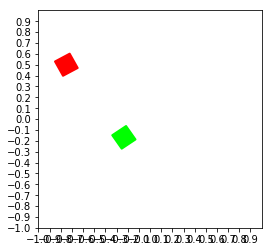

(None, None)
[-0.3   0.55  0.5 ]
path_distance = 0.4528; frame_distance = 0.0820; left_over_distance = 0.0000 
pos = 0.0820
pos = 0.1641
pos = 0.2461
pos = 0.3282
pos = 0.4102
path_distance = 1.1881; frame_distance = 0.0820; left_over_distance = 0.0395 
pos = 0.0426
pos = 0.1246
pos = 0.2066
pos = 0.2887
pos = 0.3707
pos = 0.4528
pos = 0.5348
pos = 0.6169
pos = 0.6989
pos = 0.7809
pos = 0.8630
pos = 0.9450
pos = 1.0271
pos = 1.1091
path_distance = 0.4528; frame_distance = 0.0820; left_over_distance = 0.0000 
pos = 0.0820
pos = 0.1641
pos = 0.2461
pos = 0.3282
pos = 0.4102
path_distance = 1.1881; frame_distance = 0.0820; left_over_distance = 0.0395 
pos = 0.0426
pos = 0.1246
pos = 0.2066
pos = 0.2887
pos = 0.3707
pos = 0.4528
pos = 0.5348
pos = 0.6169
pos = 0.6989
pos = 0.7809
pos = 0.8630
pos = 0.9450
pos = 1.0271
pos = 1.1091
[[0.375, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.375, 0.9, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.8, 0.0, -0.46211715726000974

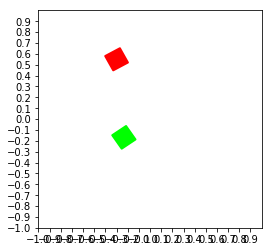

In [130]:
a.replay()